In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### The dataset I used in the current project is acquired from the Kaggle website 

In [2]:
path = 'data\European_Rosters.csv'
df = pd.read_csv(path)
data = df.copy()

#### The first step in the project was to clean our data from outliers, duplicates and missing values. In general, the most common problem was the missing values which was settled in many different ways. After that we made some hypothesis about our data and explored one of them for it’s significance.

In [3]:
data.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


In [4]:
data.shape[0]

4308

#### As we can see there are null values, many of which will be filled

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FullName                           2052 non-null   object 
 1   PlayerName                         4308 non-null   object 
 2   Affiliation                        4308 non-null   object 
 3   League                             4308 non-null   object 
 4   Jersey                             4239 non-null   object 
 5   Birth Date                         4308 non-null   object 
 6   Age                                4308 non-null   int64  
 7   birthPlace                         4150 non-null   object 
 8   Height (meters)                    4225 non-null   float64
 9   Citizenship 1                      4298 non-null   object 
 10  Citizenship 2                      742 non-null    object 
 11  Position                           4240 non-null   objec

In [6]:
data.columns.tolist()

['FullName',
 'PlayerName',
 'Affiliation',
 'League',
 'Jersey',
 'Birth Date',
 'Age',
 'birthPlace',
 'Height (meters)',
 'Citizenship 1',
 'Citizenship 2',
 'Position',
 'Position 2',
 'Foot',
 'Agent',
 'JoinedClub',
 'LastExtension',
 'ContractExpiration',
 'PlayerSponsor',
 'Youth Club 1',
 'Youth Club 2',
 'Youth Club 3',
 'Youth Club 4',
 'Youth Club 5',
 'Youth Club 6',
 'Youth Club 7',
 'nationality',
 'Games Played',
 'Market Value (Euros)',
 'Last Updated Date',
 'Accumulated Transfer Sums (Euros)',
 'Highest Market Value (Euros)',
 'Highest Market Value Date',
 'NationalTeamCaps',
 'MostRecentInjury']

In [7]:
'We include players from {} leagues which were: {}'.format(len(data.League.unique()),data.League.unique())

"We include players from 9 leagues which were: ['Bundesliga' 'Serie A' 'Eredivisie' 'Premier Liga' 'LaLiga'\n 'Premier League' 'Liga NOS' 'Jupiler Pro League' 'Ligue 1']"

## Data wrangling

#### I will create a new column named 'Age of pick', which includes the age when the player signed his biggest contract. I did that simply by subtracting the ‘Highest Market Value Date’ column from the ‘Birth Date’.

In [8]:
import math

data['Highest Market Value Date'] = data['Highest Market Value Date'].replace(math.nan, str(0))

In [9]:
ageOfPick = []
for i in range(0 , len(data['Birth Date'])):
    if(len(data['Highest Market Value Date'][i])>4):
        val = int(data['Highest Market Value Date'][i][-4:]) - int(data['Birth Date'][i][-4:])
        ageOfPick.append(val)
    else: 
        ageOfPick.append(0)

data['Age of pick'] = ageOfPick   

### Modify incorrect or missing values (Position, Height, Foot etc)

#### Let's fix the data in 'Position' column. 

In [10]:
data[['Position', 'Position 2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Position    4240 non-null   object
 1   Position 2  4307 non-null   object
dtypes: object(2)
memory usage: 67.4+ KB


In [11]:
# Replace NaN values with '0'
data['Position'].fillna('Unknown', inplace = True)
data['Position 2'].fillna('Unknown', inplace = True)

In [12]:
# as we can see there are unnecessary column values which we should replace 
data['Position'].value_counts()

Defender                                                   1397
Midfielder                                                 1179
Forward                                                    1112
Goalkeeper                                                  474
Unknown                                                      68
Position:                            Centre                  19
Position:                            Goalkeeper              14
Position:                            Central Midfield         9
Position:                            Right                    9
Position:                            Attacking Midfield       6
Contract expires:                                             6
Position:                            Left                     5
Position:                            Left Winger              4
Position:                            Right Winger             2
Position:                            Defensive Midfield       2
Midfielder                              

In [13]:
data1 = data.copy()

In [14]:
before = ['Position:                            Goalkeeper','Position:                            Central Midfield',
         'Position:                            Centre','Position:                            Attacking Midfield',
         'Position:                            Second Striker', 'Position:                            Defensive Midfield',
         'Position:                            Right Winger', 'Position:                            Left Winger']
after = ['Goalkeeper', 'Midfielder','Midfielder', 'Midfielder', 'Forward', 'Midfielder', 'Forward', 'Forward']
data1['Position'] = data['Position'].replace(before, after)

before = ['Forward ', 'Defender ', 'Midfielder ']
after = ['Forward', 'Defender', 'Midfielder']
data1['Position'] = data1['Position'].replace(before, after)

In [15]:
data1['Position 2'][data1['Position']=='Position:                            Right']

1177    Right-Back
1255    Right-Back
1279    Right-Back
1887    Right-Back
2375    Right-Back
2577    Right-Back
2979    Right-Back
3206    Right-Back
4015    Right-Back
Name: Position 2, dtype: object

In [16]:
data1['Position 2'][data1['Position']=='Position:                            Left']

22      Left-Back
1493    Left-Back
2978    Left-Back
3000    Left-Back
3394    Left-Back
Name: Position 2, dtype: object

In [17]:
data1['Position 2'][data1['Position']=='Contract expires:']

99      Contract expires:-
912     Contract expires:-
1699    Contract expires:-
2870    Contract expires:-
3017    Contract expires:-
3018    Contract expires:-
Name: Position 2, dtype: object

#### As we can see those players with position Left or Right were all of them defenders and for the 'Contract expires' values in position column we can't extract more information from 'Position 2' column

In [18]:
before = ['Position:                            Right', 'Position:                            Left']
after = ['Defender', 'Defender']
data1['Position'] = data1['Position'].replace(before, after)

In [19]:
# Also for the NaN values 'Position 2' column doesn't gives us any additional info for the player's position
data1['Position 2'][data1['Position']=='Unknown'].value_counts()

Contract expires:30.06.2020    18
Contract expires:30.06.2022    17
Contract expires:30.06.2021    14
Contract expires:30.06.2023     9
Contract expires:-              8
Right-Back                      1
Contract expires:30.06.2024     1
Name: Position 2, dtype: int64

In [20]:
data1['Position'].replace('Contract expires:', 'Unknown', inplace = True)

In [21]:
# So our final values are 

data1['Position'].value_counts()

Defender      1411
Midfielder    1216
Forward       1119
Goalkeeper     488
Unknown         74
Name: Position, dtype: int64

#### Now let's fix the data in 'Position 2' column

In [22]:
data1['Position 2'].value_counts()

Centre-Back                    747
Centre-Forward                 528
Central Midfield               523
Goalkeeper                     490
Right-Back                     353
Left-Back                      325
Defensive Midfield             322
Left Winger                    276
Right Winger                   276
Attacking Midfield             246
Second Striker                  50
Left Midfield                   48
Right Midfield                  39
Contract expires:30.06.2020     20
Contract expires:30.06.2022     20
Contract expires:30.06.2021     15
Contract expires:-              15
Contract expires:30.06.2023     10
Contract expires:30.06.2024      2
Midfielder                       1
Unknown                          1
Contract expires:30.06.2025      1
Name: Position 2, dtype: int64

In [23]:
# Replace 'Contract expires...' values with whatever is in column 'Position'

for index, i in enumerate(data1['Position 2']):
    if('Contract' in i):
        data1['Position 2'][index] = data1['Position'][index]

<ipython-input-23-a25e64f75401>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Position 2'][index] = data1['Position'][index]


In [24]:
# Minor changes to the names of the categorical values

before = ['Contract expires:', 'Central Midfield','Defensive Midfield','Left Winger','Right Winger','Attacking Midfield','Second Striker','Left Midfield','Right Midfield']
after = ['Unknown', 'Central-Midfield','Defensive-Midfield','Left-Winger','Right-Winger','Attacking-Midfield','Second-Striker','Left-Midfield','Right-Midfield']
data1['Position 2'].replace(before, after, inplace = True)

In [25]:
data1['Position 2'].value_counts()

Centre-Back           747
Centre-Forward        528
Central-Midfield      523
Goalkeeper            490
Right-Back            353
Left-Back             325
Defensive-Midfield    322
Right-Winger          276
Left-Winger           276
Attacking-Midfield    246
Unknown                74
Second-Striker         50
Left-Midfield          48
Right-Midfield         39
Midfielder              6
Forward                 5
Name: Position 2, dtype: int64

### Conclusion: For 74 players we have no clue for their position and for 11 we know only their general position

### Now let's modify the height values

#### In the ‘Height’ column we had 83 missing values and I though that the best way to fill these values was to replace them by the average height of the players in the same position and nationality.

In [26]:
grouping = data1.groupby(['nationality','Position']).agg({'Height (meters)':['mean','count']})
grouping

Height (meters)      
                                  mean count
nationality Position                        
Albania     Defender          1.877500     4
            Forward           1.895000     2
            Goalkeeper        1.935000     2
            Midfielder        1.827500     4
Algeria     Defender          1.803333     6
...                                ...   ...
Zambia      Forward           1.745000     2
            Midfielder        1.650000     1
Zimbabwe    Defender          1.870000     1
            Forward           1.770000     1
            Midfielder        1.770000     1

[356 rows x 2 columns]

In [27]:
data2 = data1.copy()

In [28]:
for index, height in enumerate(data1['Height (meters)']):
    if( np.isnan(height) ):
        nationality = data2['nationality'][index]
        position = data2['Position'][index]
        if(position != 'Unknown'):
            new_height = round(grouping.loc[nationality].loc[position][0], 2)   
            data2['Height (meters)'][index] =  new_height  # Replace with the average of position, nationality value
        else:
            new_height = round(data1.groupby('nationality').mean().loc[nationality]['Height (meters)'], 2)
            data2['Height (meters)'][index] = new_height

<ipython-input-28-baeefdbdd534>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Height (meters)'][index] = new_height
<ipython-input-28-baeefdbdd534>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Height (meters)'][index] =  new_height  # Replace with the average of position, nationality value


#### In the previous way we filled the empty height values based on the player's average nationality height and when the player's position was known we took also that info into consideration.

In [29]:
data2['Height (meters)'].describe()

count    4308.000000
mean        1.825940
std         0.065942
min         1.590000
25%         1.780000
50%         1.830000
75%         1.870000
max         2.040000
Name: Height (meters), dtype: float64

### We'll extract only the data that we'll need

In [30]:
Features = ['PlayerName', 'League', 'Age', 'Height (meters)', 'Position', 'Position 2', 'Foot', 'Agent', 'nationality',
    'Games Played', 'Market Value (Euros)', 'Highest Market Value (Euros)', 'NationalTeamCaps', 'Age of pick']
X = data2[Features]
X.rename(columns={'nationality':'Nationality'}, inplace = True)

c:\users\dionisis\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [31]:
X.head()

,PlayerName,League,Age,Height (meters),Position,Position 2,Foot,Agent,Nationality,Games Played,Market Value (Euros),Highest Market Value (Euros),NationalTeamCaps,Age of pick
0,Anthony Modeste,Bundesliga,31,1.87,Forward,Centre-Forward,right,NaN,France,1,7000000.0,20000000.0,16,29
1,Benno Schmitz,Bundesliga,25,1.82,Defender,Right-Back,right,Kögl & Partner GmbH,Germany,0,1000000.0,1750000.0,11,23
2,Birger Verstraete,Bundesliga,25,1.75,Midfielder,Defensive-Midfield,right,SportPlus Football ...,Belgium,0,4000000.0,4000000.0,1,24
3,Brady Scott,Bundesliga,20,1.87,Goalkeeper,Goalkeeper,right,PRO FC,United States,14,100000.0,100000.0,0,19
4,Christian Clemens,Bundesliga,28,1.79,Midfielder,Right-Midfield,right,DC International ...,Germany,15,1750000.0,3500000.0,5,22


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PlayerName                    4308 non-null   object 
 1   League                        4308 non-null   object 
 2   Age                           4308 non-null   int64  
 3   Height (meters)               4308 non-null   float64
 4   Position                      4308 non-null   object 
 5   Position 2                    4308 non-null   object 
 6   Foot                          4098 non-null   object 
 7   Agent                         3619 non-null   object 
 8   Nationality                   4308 non-null   object 
 9   Games Played                  4308 non-null   int64  
 10  Market Value (Euros)          4289 non-null   float64
 11  Highest Market Value (Euros)  4091 non-null   float64
 12  NationalTeamCaps              4308 non-null   int64  
 13  Age

### Some insights on our data

#### Bellow we can see that most of the players sign their largest career contract at the age of 22

(13.0, 36.0)

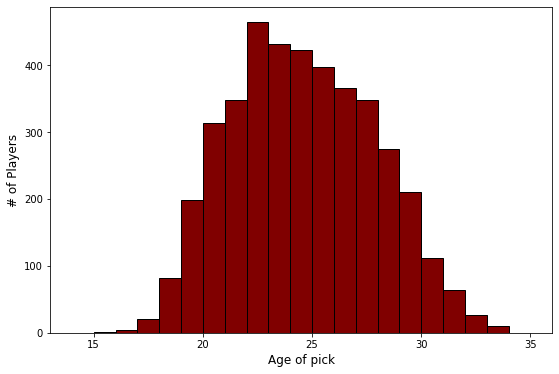

In [33]:
pickAge = X['Age of pick'].replace(0,np.NaN)
binNum = np.linspace(int(min(pickAge)),int(max(pickAge)), num = int(max(pickAge)-min(pickAge)) + 1)

plt.figure(figsize=(9,6))
plt.hist(pickAge, bins = binNum, color = 'maroon', ec='black')
plt.xlabel('Age of pick',fontsize = 12)
plt.ylabel('# of Players',fontsize = 12)
plt.xlim(13,36)

In [34]:
X['Foot'].fillna('Unknown',inplace = True)
X['Foot'].replace('-','Unknown',inplace = True)

c:\users\dionisis\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\dionisis\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [35]:
X1 = X.groupby(['Position 2','Foot']).size().to_frame()

In [36]:
X1.rename(columns={0:'Count'}, inplace = True)

X1.reset_index(inplace = True)

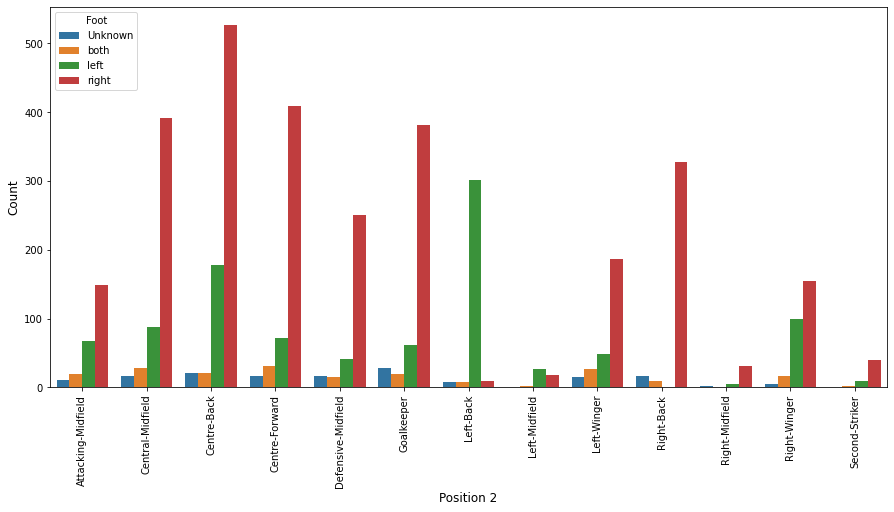

In [37]:
mask = X1['Position 2'].isin(['Unknown', 'Forward', 'Midfielder'])

fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation = 90)
ax = sns.barplot(x = 'Position 2', y = 'Count', hue = 'Foot', data = X1[~mask])

#### As we can see from the above diagram, in some player's positions there is a big gap in the number between left and right footed. In these cases we can replace the unknown foot values with the most frequent option in the exact position

In [38]:
X['Foot'].value_counts()

right      2888
left       1004
Unknown     216
both        200
Name: Foot, dtype: int64

#### We will replace the unknown values of foot for the: left and right back (where is the biggest gap)

In [39]:
# left back → left foot, right back → right foot

mask = (X['Foot'] == 'Unknown') & (X['Position 2'] == 'Left-Back')
X.loc[mask, 'Foot'] = 'left'

mask = (X['Foot'] == 'Unknown') & (X['Position 2'] == 'Right-Back')
X.loc[mask, 'Foot'] = 'right'

c:\users\dionisis\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [40]:
X['Foot'].value_counts()

right      2904
left       1011
both        200
Unknown     193
Name: Foot, dtype: int64

### Hypothesis testing 

* One hypothesis we could make is whether it is normal for a team consisted of 24 players to have 8 or more left – footed.
* One other hypothesis could be whether a team consisted of young players will have more profits from sales in the future.
* A last hypothesis could be if picking 10 players of 26 years old, how possibly is it for all of them to have already signed their biggest contract.   

#### In our hypothesis testing we will experiment with the 'Foot' data. 
#### Let's say that one team of 26 players is consisted of 8 left-foot players. We will examine whether or not this is unnormal 

In [41]:
# Let's first calculate for a randomly picked player to be left-footed - excluding those who can use both feet

left = X[X['Foot'] == 'left']['Foot'].value_counts()[0]
total = X[X['Foot'] == 'right']['Foot'].value_counts()[0] + left

p = round(left / total, 3)
p

0.258

#### Since we have only two possible outcomes – one with possibility p (left footed) and one with possibility 1-p (right footed), we could use the binomial distribution.

In [42]:
from scipy.stats import binom

1 - binom.cdf(7, 26, p)

0.34975366182966083

#### The probability for a team to have 8 or more left- footed players is about 34%. This is more than 5%, so we can't reject the null and conclude that this fact is rational.

In [43]:
binom.ppf(0.95, 26, p) + 1

11.0

#### On the other hand if a team had 11 or more left-footed players then we could say that this is abnormal with 95% confidence level